In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
mnist = keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [46]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

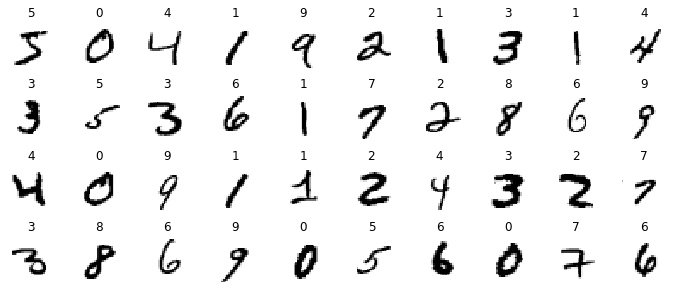

In [49]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [50]:
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [51]:
X_valid.shape

(5000, 28, 28)

In [52]:
X_test.shape

(10000, 28, 28)

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [54]:
model.layers

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [57]:
history=model.fit(X_train,y_train,validation_data=(X_valid, y_valid),epochs=7)

Train on 55000 samples, validate on 5000 samples
Epoch 1/7
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2254 - accuracy: 0.9322 - val_loss: 0.1099 - val_accuracy: 0.9664
Epoch 2/7
55000/55000 [==============================] - 9s 168us/sample - loss: 0.0920 - accuracy: 0.9719 - val_loss: 0.0765 - val_accuracy: 0.9750
Epoch 3/7
55000/55000 [==============================] - 9s 166us/sample - loss: 0.0639 - accuracy: 0.9789 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 4/7
55000/55000 [==============================] - 9s 166us/sample - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0991 - val_accuracy: 0.9716
Epoch 5/7
55000/55000 [==============================] - 9s 168us/sample - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0781 - val_accuracy: 0.9774
Epoch 6/7
55000/55000 [==============================] - 9s 167us/sample - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0775 - val_accuracy: 0.9806
Epoch 7/7
55000/55000 [==============================] - 

In [58]:
history.params

{'batch_size': 32,
 'epochs': 7,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [59]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

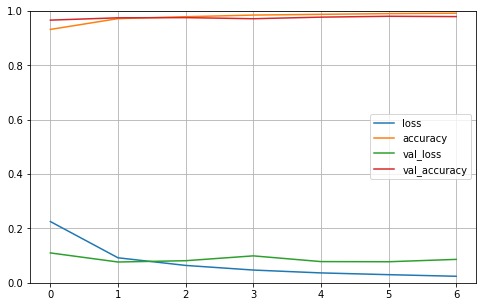

In [60]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08386740147890377, 0.9787]

In [76]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred

array([[3.7692551e-09, 1.2141364e-08, 6.9491914e-09, 1.8505991e-08,
        1.2076113e-09, 3.3467797e-12, 5.9538712e-14, 9.9999309e-01,
        1.9503785e-10, 6.9648199e-06],
       [1.9168425e-09, 5.3226080e-07, 9.9999952e-01, 5.3218030e-10,
        6.1881944e-14, 1.1808219e-13, 2.8484647e-13, 7.9316908e-13,
        9.0893586e-09, 9.2837908e-17],
       [9.7897562e-08, 9.9996471e-01, 4.7638784e-07, 5.5084791e-07,
        2.1700753e-06, 2.9431698e-07, 1.6240293e-07, 1.7266464e-05,
        1.4175576e-05, 1.0628194e-08]], dtype=float32)

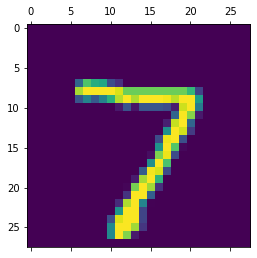

In [77]:
plt.matshow(X_new[0])

In [78]:
import numpy as np
np.argmax(y_pred[0])

7

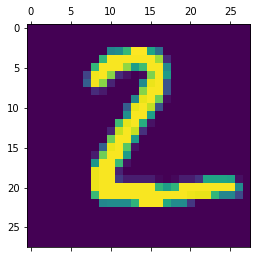

In [79]:
plt.matshow(X_new[1])

In [80]:
np.argmax(y_pred[1])

2

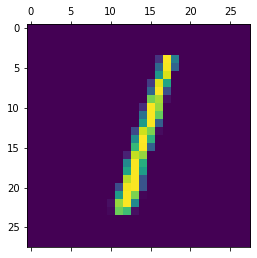

In [81]:
plt.matshow(X_new[2])

In [83]:
np.argmax(y_pred[2])

1

In [67]:
y_pred=model.predict(X_test)

In [68]:
y_pred

array([[3.7692551e-09, 1.2141364e-08, 6.9492176e-09, ..., 9.9999309e-01,
        1.9503822e-10, 6.9648268e-06],
       [1.9168425e-09, 5.3226131e-07, 9.9999952e-01, ..., 7.9316908e-13,
        9.0893586e-09, 9.2837908e-17],
       [9.7897377e-08, 9.9996471e-01, 4.7638741e-07, ..., 1.7266480e-05,
        1.4175564e-05, 1.0628194e-08],
       ...,
       [9.6230727e-15, 4.3778602e-08, 5.8290959e-13, ..., 2.5237955e-07,
        1.1906313e-08, 1.0936047e-07],
       [5.0375695e-07, 1.4302657e-12, 1.8269258e-11, ..., 1.0433457e-08,
        7.0741107e-06, 7.2082224e-10],
       [1.2339410e-10, 9.8890046e-15, 1.2743603e-12, ..., 2.9923916e-15,
        5.6223044e-11, 1.9968914e-10]], dtype=float32)

In [69]:
y_pred=[np.argmax(i) for i in y_pred]

In [70]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [71]:
cm=tf.math.confusion_matrix(
    labels=y_test, predictions=y_pred)

Text(69.0, 0.5, 'Truth')

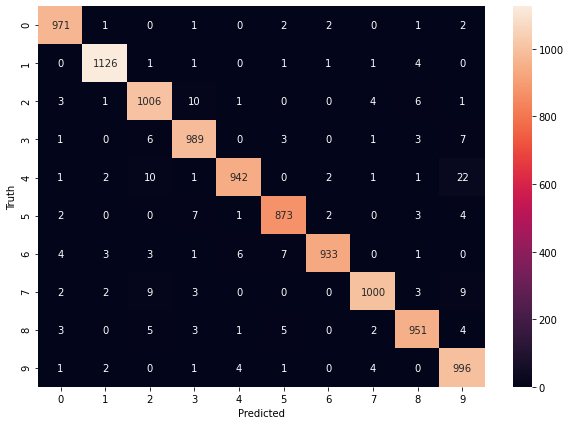

In [72]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')